<h1>PAIRS TRADING RESEARCH</h1>

<h4>The porpouse of this repository is to research and find the best currencies for pairs trading based on a given historical data</h4>
<quote><i>*If you don't know Pairs Trading yet, please check my Github profile...</i></quote>  <a href=https://github.com/Algo-Tradings> Click Here </a>

<quote><i>**Each process in this research saves an output file. That way you could use it as you wish, or even in another repos of myself.</i></quote>

<h3>1. Run Once </h3> 
install necessary packages.
After that, you need comment the above part of code

In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install python-binance
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install matplotlib

<h3>2. Imports </h3>
get classes of this system

In [1]:
%matplotlib inline
from research import Loader
from research import Cleaner
from research import Correlation
from research import Cointegration
from research import Ratio

# import pandas as pd

<h3>3. Historical Data </h3> 
Select the desired timeframe and interval.

In [3]:

# hist_df = pd.read_csv('./data/raw/historical_data.csv', header=[0, 1], index_col=0) # Uncomment if want last saved historical_data
hist_df = Loader().get_historical_data(timeframe='1d', interval='1 years ago') # To get new data (it takes sometime)
hist_df

BTCUSDT                                ETHUSDT                    \
                Open      High       Low     Close     Open     High      Low   
Time                                                                            
2022-04-09  42252.02  42800.00  42125.48  42753.97  3192.39  3268.40  3181.28   
2022-04-10  42753.96  43410.30  41868.00  42158.85  3258.57  3307.22  3193.00   
2022-04-11  42158.85  42414.71  39200.00  39530.45  3203.04  3213.63  2950.00   
2022-04-12  39530.45  40699.00  39254.63  40074.94  2979.75  3085.00  2950.00   
2022-04-13  40074.95  41561.31  39588.54  41147.79  3027.65  3128.97  2996.86   
...              ...       ...       ...       ...      ...      ...      ...   
2023-04-04  27800.00  28444.44  27662.79  28165.47  1810.51  1891.91  1802.01   
2023-04-05  28165.47  28775.00  27805.10  28170.01  1870.38  1942.98  1864.58   
2023-04-06  28170.01  28182.05  27711.00  28033.82  1908.68  1909.91  1853.70   
2023-04-07  28033.83  28100.00  27766.94  27906.33  1872.41  1882.61  1841.46   
2023-04-08  27906.34  28154.99  27859.02  28127.42  1863.73  1879.38  1854.62   

                    NEOUSDT         ...   IDUSDT          LOOMUSDT           \
              Close    Open   High  ...      Low    Close     Open     High   
Time                                ...                                       
2022-04-09  3258.57   21.83  22.58  ...      NaN      NaN      NaN      NaN   
2022-04-10  3203.04   22.54  22.84  ...      NaN      NaN      NaN      NaN   
2022-04-11  2979.74   21.58  21.78  ...      NaN      NaN      NaN      NaN   
2022-04-12  3027.66   19.70  20.74  ...      NaN      NaN      NaN      NaN   
2022-04-13  3118.28   20.39  21.35  ...      NaN      NaN      NaN      NaN   
...             ...     ...    ...  ...      ...      ...      ...      ...   
2023-04-04  1870.37   11.97  12.11  ...  0.43906  0.46051  0.06397  0.06487   
2023-04-05  1908.69   12.02  12.22  ...  0.45438  0.46235  0.06442  0.06592   
2023-04-06  1872.41   12.03  13.02  ...  0.44400  0.45092  0.06590  0.07073   
2023-04-07  1863.72   12.40  12.46  ...  0.44550  0.45262  0.06662  0.06666   
2023-04-08  1877.20   12.15  12.59  ...  0.44500  0.45394  0.06476  0.06677   

                             OAXUSDT                          
                Low    Close    Open    High     Low   Close  
Time                                                          
2022-04-09      NaN      NaN     NaN     NaN     NaN     NaN  
2022-04-10      NaN      NaN     NaN     NaN     NaN     NaN  
2022-04-11      NaN      NaN     NaN     NaN     NaN     NaN  
2022-04-12      NaN      NaN     NaN     NaN     NaN     NaN  
2022-04-13      NaN      NaN     NaN     NaN     NaN     NaN  
...             ...      ...     ...     ...     ...     ...  
2023-04-04  0.06337  0.06442  0.3017  0.3098  0.2859  0.2984  
2023-04-05  0.06401  0.06582  0.2980  0.3308  0.2955  0.3059  
2023-04-06  0.06517  0.06662  0.3059  0.3280  0.3009  0.3116  
2023-04-07  0.06358  0.06474  0.3118  0.3130  0.2878  0.2912  
2023-04-08  0.06476  0.06574  0.2908  0.2934  0.2812  0.2894  

[365 rows x 1180 columns]

<h3>4. Cleaning Data </h3> 

In [4]:
cleared_df = Cleaner().get_cleared_data(hist_df)
cleared_df

,BTCUSDT,ETHUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,IOTAUSDT,XLMUSDT,...,ACAUSDT,XNOUSDT,WOOUSDT,ALPINEUSDT,ASTRUSDT,KDAUSDT,APEUSDT,BSWUSDT,BIFIUSDT,MULTIUSDT
Time,,,,,,,,,,,,,,,,,,,,,
2022-04-09,42753.97,3258.57,22.54,112.70,7.074,1.0450,0.7622,2.417,0.7457,0.2049,...,1.5920,2.440,0.5265,6.3544,0.2655,6.281,10.9757,1.2794,1406.1,14.39
2022-04-10,42158.85,3203.04,21.58,110.30,6.803,1.0270,0.7543,2.361,0.7131,0.2004,...,1.7280,2.465,0.5020,6.1538,0.3086,6.120,12.0711,1.2385,1397.3,13.36
2022-04-11,39530.45,2979.74,19.69,102.40,6.195,0.9200,0.6948,2.163,0.6492,0.1867,...,1.5100,2.190,0.4565,5.2825,0.2607,5.395,10.9404,1.0418,1371.5,11.42
2022-04-12,40074.94,3027.66,20.39,104.80,6.433,0.9550,0.7152,2.244,0.6654,0.1925,...,1.4610,2.269,0.4636,5.8174,0.2670,5.593,11.5902,1.0510,1491.8,12.06
2022-04-13,41147.79,3118.28,21.26,110.50,6.767,0.9740,0.7232,2.359,0.6813,0.1965,...,1.5170,2.279,0.4787,5.9834,0.2633,5.873,13.2423,1.2472,1529.0,12.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-04,28165.47,1870.37,12.02,92.58,3.126,0.3894,0.5026,1.193,0.2218,0.1060,...,0.0970,0.887,0.2278,2.2777,0.0647,0.985,4.2340,0.1813,506.1,9.65
2023-04-05,28170.01,1908.69,12.03,92.64,3.149,0.3923,0.5055,1.189,0.2298,0.1072,...,0.0984,0.900,0.2238,2.2912,0.0655,0.995,4.2320,0.1874,510.3,9.69
2023-04-06,28033.82,1872.41,12.40,90.97,3.219,0.3829,0.5028,1.218,0.2273,0.1058,...,0.1008,0.953,0.2140,2.3301,0.0639,0.978,4.2290,0.1834,502.7,9.27


<h3>5. Correlated Currencies </h3>
Describe the minimum correlation rate that you expect

In [5]:
corr_df = Correlation().get_log_correlation(cleared_df, min_correlation=0.83)
corr_df

,Currency1,Currency2,Correlation
0,BTCUSDT,ETHUSDT,0.893195
1,BTCUSDT,FUNUSDT,0.849721
2,BTCUSDT,RUNEUSDT,0.838866
3,BTCUSDT,GNOUSDT,0.850868
4,ETHUSDT,ETCUSDT,0.832258
...,...,...,...
73,ALICEUSDT,BAKEUSDT,0.845557
74,TLMUSDT,BAKEUSDT,0.848076
75,TLMUSDT,SLPUSDT,0.853947
76,WAXPUSDT,POWRUSDT,0.865664


<h3>6. Cointegrated Currencies </h3>

In [6]:
coint_df = Cointegration().get_cointegration(corr_df, cleared_df)
coint_df

,Currency1,Currency2,Correlation,Cointegration,Criticals
24,IOTAUSDT,ZENUSDT,0.834406,-4.305986,-3.926781
31,THETAUSDT,ENJUSDT,0.837323,-4.622077,-3.926781
34,THETAUSDT,ALICEUSDT,0.850621,-4.893424,-3.926781
36,THETAUSDT,BAKEUSDT,0.830443,-5.276288,-3.926781
45,ENJUSDT,WAXPUSDT,0.848592,-6.670217,-3.926781
52,IOTXUSDT,ALICEUSDT,0.843900,-4.244810,-3.926781
53,IOTXUSDT,TLMUSDT,0.841078,-4.826925,-3.926781
56,STMXUSDT,WAXPUSDT,0.841175,-6.776812,-3.926781
58,COMPUSDT,AAVEUSDT,0.833715,-4.365774,-3.926781
60,MANAUSDT,SANDUSDT,0.893463,-4.388134,-3.926781


<h3>7.Final Result</h3>
Shows a list of pairs that is potencially profitable and its ratio

In [7]:
researched_df = Ratio().get_ratio(coint_df, cleared_df)
researched_df

,Currency1,Currency2,Correlation,Cointegration,Criticals,Ratio
60,MANAUSDT,SANDUSDT,0.893463,-4.388134,-3.926781,0.849108
75,TLMUSDT,SLPUSDT,0.853947,-4.313997,-3.926781,6.883582
34,THETAUSDT,ALICEUSDT,0.850621,-4.893424,-3.926781,0.611688
45,ENJUSDT,WAXPUSDT,0.848592,-6.670217,-3.926781,5.488810
73,ALICEUSDT,BAKEUSDT,0.845557,-4.229541,-3.926781,7.632347
52,IOTXUSDT,ALICEUSDT,0.843900,-4.244810,-3.926781,0.015598
56,STMXUSDT,WAXPUSDT,0.841175,-6.776812,-3.926781,0.082497
53,IOTXUSDT,TLMUSDT,0.841078,-4.826925,-3.926781,1.238508
31,THETAUSDT,ENJUSDT,0.837323,-4.622077,-3.926781,2.403433
24,IOTAUSDT,ZENUSDT,0.834406,-4.305986,-3.926781,0.019097


<h3>8. Visualization</h3>
Minimalist because that is not the porpuse of this research notebook

In [8]:
import matplotlib.pyplot as plt
import numpy as np

Linear Cointegration Between Two Currencies Above

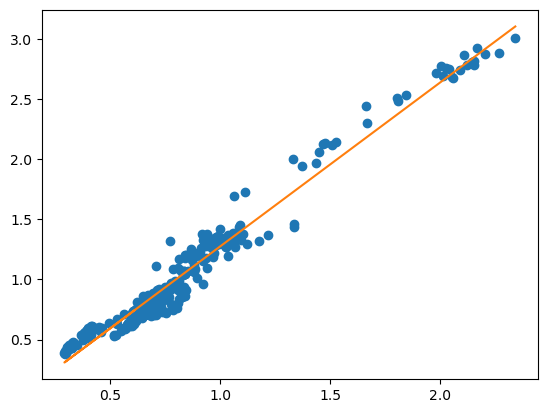

In [9]:
x=cleared_df['MANAUSDT']
y=cleared_df['SANDUSDT']

plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)

Correlation of same currencies over the time

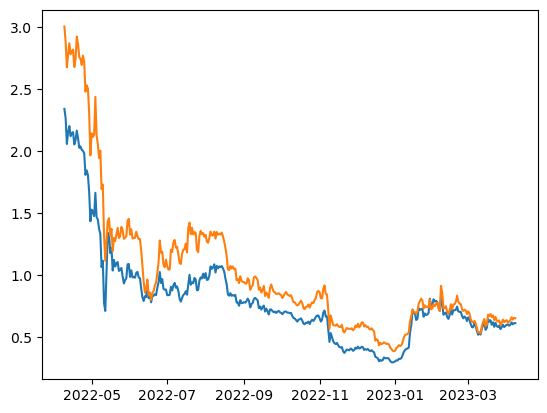

In [10]:
plt.plot(cleared_df.index, x)
plt.plot(cleared_df.index, y)
plt.show()

<h3>9. Considerations</h3>
In this research we clearly saw that some currencies are higly correlated and cointegrated. That way using pairs trading strategy, we have a huge potencial to make consistent profits with them.

<i>If you want full usage of this research, kindly consider visit my others pairs-trading repos.
For that strategy I have a backtester, a dashboard and also a 100% autonomous bot</i>


<h3>Thank you for your time!</h3>